In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("midterm.ipynb")

In [2]:
# Run this cell

from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
np.set_printoptions(legacy='1.13')

## Logistics

**Checkpoint.** For full credit, **you must complete the checkpoint** (this is your first draft of the project). For the checkpoint, you must complete the questions up until the end of Part 2 (indicated by the cell that says "End of Checkpoint"), by **Friday, Feburary 16, 11:59pm**. Submit in Gradescope.

**Deadline.** The full project is due on **Friday, Feburary 23, 11:59pm**. It's **much** better to be early than late, so start working now. Submit in Gradescope.

**Partners.** You may work with one other partner. Only one of you is required to submit the project in Gradescope.

**Rules.** Don't share your code with anybody but your partner. You are welcome to discuss questions with other students, but don't share the answers. The experience of solving the problems in this project will prepare you for exams (and life). If someone asks you for the answer, resist! Instead, you can demonstrate how you would solve a similar problem.

**Support.** You are not alone! Come to office hours, post on Ed, and talk to your classmates. If you want to ask about the details of your solution to a problem, make a private Ed post and the staff will respond. If you're ever feeling overwhelmed or don't know how to make progress, send a Ed message (public, private or anonymous) to your TA or ULA for help. 

**Tests.** Passing the tests for a question **does not** mean that you answered the question correctly. Tests usually only check that your table has the correct column labels. However, more tests will be applied to verify the correctness of your submission in order to assign your final score, so be careful and check your work!

**Advice.** Develop your answers incrementally. To perform a complicated table manipulation, break it up into steps, perform each step on a different line, give a new name to each result, and check that each intermediate result is what you expect. You can add any additional names or functions you want to the provided cells. 

All of the concepts necessary for this project are found in the textbook. If you are stuck on a particular problem, reading through the relevant textbook section often will help clarify the concept.

Here is a roadmap for this project:

* In Part 1, we'll investigate whether the speed limit has an effect on limiting car accidents.
* In Part 2, we'll look at the salaries of data scientists in different big companies to see if they differ significantly.
* In Part 3, you'll design your own experiment using the titanic dataset.

## Part 1: SPEED LIMIT AND ACCIDENTS

In 1961-1962, an experiment was conducted in Sweden to assess whether the implementation of a speed limit reduced the amount of accidents on a highway. Researchers found that cars tended to drive significantly faster on days without a speed limit than days with one. 

Our data contains the following rows and information:
1. **year** - indicates the year
2. **day** - indicates the day of the year eg. 1 = Jan 1, 2 = Jan 2, etc.
3. **limit** - whether there was a speed limit enforced on that day
4. **accidents** - count of how many accidents there was recorded on that singular day

In [3]:
# Run this cell
traffic = Table.read_table('data/traffic.csv')
traffic.show(5)

year,day,limit,accidents
1961,1,no,9
1961,2,no,11
1961,3,no,9
1961,4,no,20
1961,5,no,31


**Question 1** 

Before we conduct any statistical analysis, we should do some data exploration. First, let's see if there is a difference in average accidents for days with a speed limit versus days without one.

Create a table named `accidents`, with two columns and two rows. The two columns should be "limit" and "accidents mean" There should be one row for whether there was a speed limit ('yes') and not ('no'), and each row should encode the average accidents depending on whether there was a speed limit imposed.



In [4]:
accidents = traffic.select(2, 3).group("limit", np.average)
accidents

limit,accidents average
no,23.1304
yes,18.913


In [5]:
grader.check("q1_1")

q1_1 results: All test cases passed!

**Question 2.** Let's visualize our data.

Create a bar chart to visualize the difference in these two groups. For a refresher on how to create a bar chart, please reference the textbook: [Ch 7.1.1 Bar Chart](https://inferentialthinking.com/chapters/07/1/Visualizing_Categorical_Distributions.html#bar-chart)



<!-- BEGIN QUESTION -->



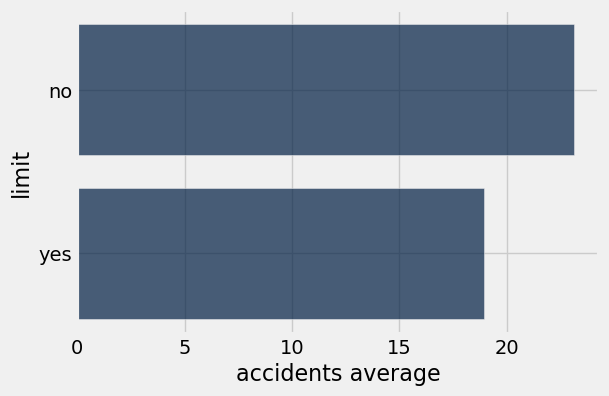

In [6]:
# Create Bar Histogram Here

accidents.barh("limit")

<!-- END QUESTION -->

**Question 3:**
Through our visualization, we can see that there are on average more accidents on days without a speed limit. Thus, we define our hypothesis as follows:

**Test Statistic:** The average difference of accidents between days with no speed limit and days with a speed limit.

**Null Hypothesis:** The speed limit does not affect the amount of accidents on any given day. Any deviation is due to random chance

**Alternative Hypothesis:** The speed limit does reduce the amount of accidents on any given day.

In the cell below, write a code to compute the average difference of accidents for days with a speed limit versus days without one.


In [7]:
accidents_observed_statistic = accidents.column("accidents average").item(0) - accidents.column("accidents average").item(1)
accidents_observed_statistic

4.217391304347824

In [8]:
grader.check("q1_3")

q1_3 results: All test cases passed!

**Question 4:** Now, create a function `compute_accidents_test_statistic` which takes in a table like traffic and computes our test statistic, which is the average difference of accidents between days with no speed limit and days with a speed limit.

This function should combine what was done in Q1 and Q3, and should have the same output as Q3.


In [9]:
def compute_accidents_test_statistic(tbl):
    temp = tbl.group("limit", np.average)
    observed_statistic = temp.column("accidents average").item(0) - temp.column("accidents average").item(1)
    return observed_statistic
    
traffic_observed_statistic = compute_accidents_test_statistic(traffic)
traffic_observed_statistic

4.217391304347824

In [10]:
grader.check("q1_4")

q1_4 results: All test cases passed!

**Question 5:** Now that we have defined hypotheses and a test statistic, we are ready to conduct a hypothesis test. We'll start by defining a function to simulate the test statistic under the null hypothesis, and then use that function 1000 times to understand the distribution under the null hypothesis.

Write a function to simulate the test statistic under the null hypothesis. 

The `simulate_traffic_null` function should simulate the null hypothesis once (not 1000 times) and return the value of the test statistic for that simulated sample.

**HINT:** This is similar to that of your Death Penalty lab! We are trying to conduct A/B testing!



In [11]:
def simulate_traffic_null():
    shuffled_column = traffic.sample(with_replacement = False).column("limit")
    new_table = traffic.drop("limit").with_column("limit", shuffled_column)
    #new_table = new_table.group("limit", np.average)
    #test_stat = new_table.column("accidents average").item(0) - new_table.column("accidents average").item(1)
    #return test_stat
    return compute_accidents_test_statistic(new_table)
    
# Run your function once to make sure that it works.
simulate_traffic_null()



-0.8376811594202884

In [12]:
grader.check("q1_5")

q1_5 results: All test cases passed!

**Question 6:** Fill in the blanks below to complete the simulation for the hypothesis test. Your simulation should compute 1000 values of the test statistic under the null hypothesis and store the result in the array `accidents_simulated_stats`.

*Hint*: You should use the function you wrote above in Question 5.

*Note*: Warning: running should only take a couple minutes at max!  We encourage you to check your `simulate_traffic_null()` code to make sure it works correctly before running this cell. 


<!-- BEGIN QUESTION -->



In [13]:
accidents_simulated_stats = make_array()

for i in np.arange(1000):
    test = simulate_traffic_null()
    accidents_simulated_stats = np.append(accidents_simulated_stats, test)

<!-- END QUESTION -->

The following line will plot the histogram of the simulated test statistics, as well as a point for the observed test statistic. Make sure to run it, as it will be graded. 

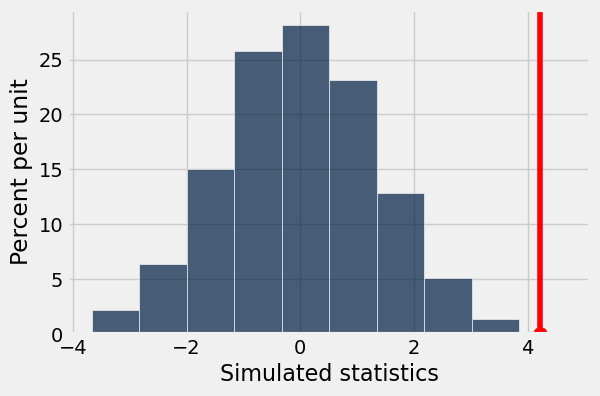

In [14]:
# RUN THIS CELL FOR PLOT

Table().with_column('Simulated statistics', accidents_simulated_stats).hist()
plots.scatter(accidents_observed_statistic, 0, color='red', s=100)
plots.axvline(x=accidents_observed_statistic, color = 'red');

**Question 7:** Compute the p-value for this hypothesis test, and assign it to the name `accidents_p_value`.



In [15]:
accidents_p_value = (sum(accidents_simulated_stats >= accidents_observed_statistic) / len(accidents_simulated_stats))
accidents_p_value

0.001

In [16]:
grader.check("q1_7")

q1_7 results: All test cases passed!

**Question 8:** Using the P-Value above, what can we conclude about the implimentation of a speed limit in reference to the difference of accidents? Test under a p-value cutoff of 0.05.

**What does our p-value mean in this experiment?**


Since our p value is less than the p value cutoff, we can reject the null hypothesis. Thus, it is not true that the speed limit has no effect on the number of accidents per day. Differences in number of accidents per day is not due to chance.

<!-- END QUESTION -->

## Part 2: DATA SCIENCE COMPENSATION

[Kaggle](https://www.kaggle.com/) is a community for anyone interested in data science. There are people with experience ranging from complete beginners to experts within the field. There are also datasets on Kaggle on any topic imaginable for anyone to conduct data science methods on!


This dataset is quite large, but we have cleaned and refined it to only have data relevant for our experiment. The columns are as follows:

1. **company** - The company an individual works in, either Facebook or Microsoft
2. **title** - Their job title (which are all data scientists)
3. **total_compensation** - Their base pay
4. **years_of_experience** - How many years of total work experience the individual has at their respective title.
5. **years_at_company** - How long the individual has stayed in their respective company.

In [17]:
# load csv

ds = Table.read_table('data/ds_data.csv')
ds.show(5)

company,title,total_compensation,years_of_experience,years_at_company
Facebook,Data Scientist,370000,8,3
Facebook,Data Scientist,225000,11,6
Facebook,Data Scientist,200000,5,0.25
Facebook,Data Scientist,240000,10,1
Facebook,Data Scientist,193000,1,0


**Question 1.** Companies like Facebook and Microsoft are titans in the tech industries, but do they pay their data scientists the same?

Create a table named `compensation`, with two columns and two rows. The two columns should be "company" and "total_compensation mean" There should be one row for Facebook and one row for Microsoft group, and each row should encode the total average salary of data scientisits within their respective company.



In [18]:
compensation = ds.select("company", "total_compensation").group("company", np.average)
compensation

company,total_compensation average
Facebook,259478
Microsoft,214908


In [19]:
grader.check("q2_1")

q2_1 results: All test cases passed!

**Question 2.**  Then, then create a bar chart to visualize the difference in these two groups. 


<!-- BEGIN QUESTION -->



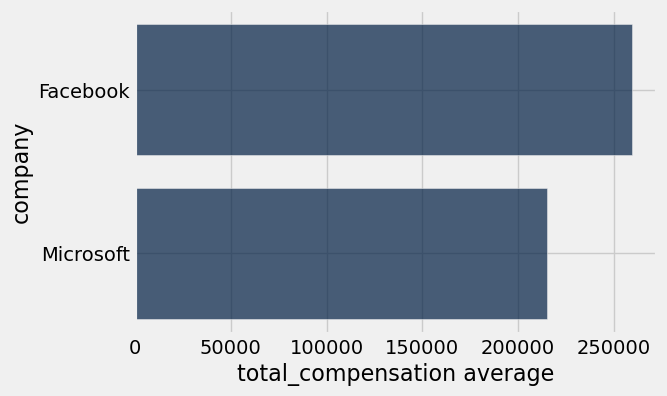

In [20]:
# Create Bar Histogram Here

compensation.barh("company")

<!-- END QUESTION -->

**Question 3:**

Through our visualization, we can see that Facebook on average pays more than Microsoft. Thus, we define our hypothesis as follows:

**Test Statistic:** The average difference of salaries of data scientists in Facebook vs Microsoft.

**Null Hypothesis:** Facebook and Microsoft pay their data scientists the same. Any deviation is due to random chance

**Alternative Hypothesis:** Facebook pays their data scientists more than Microsoft.

In the cell below, write a code to compute the average difference of salaries for data scientists in Facebook vs Microsoft.


In [21]:
comp_diff = compensation.column("total_compensation average").item(0) - compensation.column("total_compensation average").item(1)
comp_diff

44570.42676818272

In [22]:
grader.check("q2_3")

q2_3 results: All test cases passed!

**Question 4:** In the code cell below, do any sort of exploratory analysis (like visualizing total compensation versus years of experience) and create an inferential/observational comment based on your code. For example, your exploratory code may lead you to find that there may be other outside factors aside from which company data scientists work in that determine the total compensation.

You will get full credit as long as there is some exploratory coding and thoughtful analysis.



Based on the following two histograms, we can make some observations regarding potential factors affecting total compensation. It seems that years spent at a company does not affect total compensation as the distribution roughly follows a bell curve. However, years of experience seems to affect compensation. More experience is associated with increased total compensation.

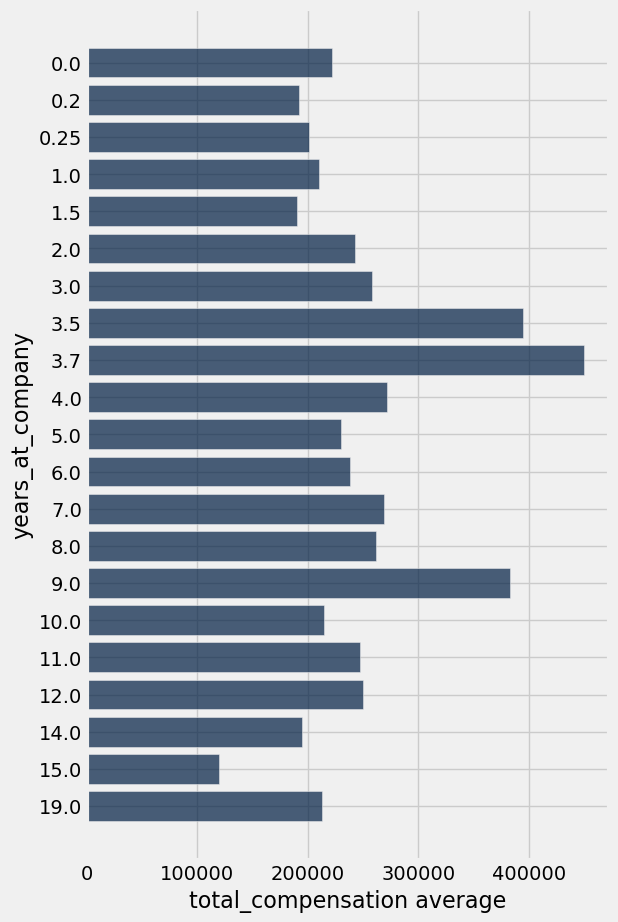

In [23]:
graph_analysis_company = ds.select("years_at_company", "total_compensation").group("years_at_company", np.average)
graph_analysis_company.barh("years_at_company")

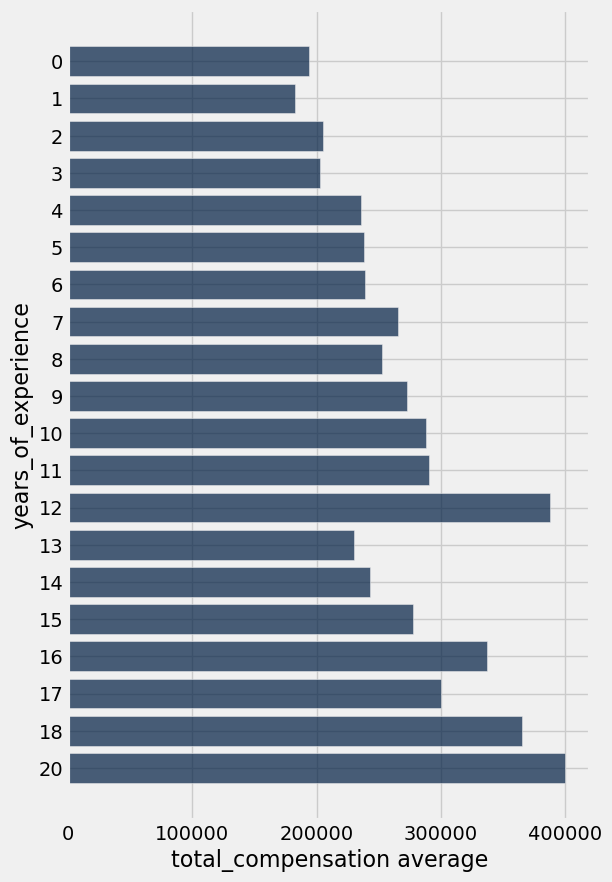

In [24]:
graph_analysis_experience = ds.select("years_of_experience", "total_compensation").group("years_of_experience", np.average)
graph_analysis_experience.barh("years_of_experience")

<!-- END QUESTION -->

**Question 5:** Now, create a function `compensation_diff` which takes in a table like `ds` and computes our test statistic, which is the average difference of salaries of data scientists in Facebook vs Microsoft.


In [25]:
def compensation_diff(tbl):
    """Returns the absolute difference in average salary between the two groups (companies)"""
    temp = tbl.select("company", "total_compensation").group("company", np.average)
    test_statistic = abs(temp.column("total_compensation average").item(0) - temp.column("total_compensation average").item(1))
    return test_statistic
    
compensation_diff(ds)


44570.42676818272

In [26]:
grader.check("q2_5")

q2_5 results: All test cases passed!

**Question 6:** Fill in the function `one_bootstrap_cd` so that it generates one bootstrap sample and computes the difference of compensation between Facebook and Microsoft. Assign `bootstrap_cds` to 1000 computation of our test statistic from our bootstrapped sample.



In [27]:
def one_bootstrap_cd():
    global ds
    sampled_table = ds.sample()
    while (sampled_table.select("company", "total_compensation").group("company", np.average).num_rows == 1):
        sampled_table = ds.sample()
    return compensation_diff(sampled_table)

one_bootstrap_cd()

bootstrap_cds = make_array()
for i in np.arange(1000):
    new_bootstrap_cd = one_bootstrap_cd()
    bootstrap_cds = np.append(bootstrap_cds, new_bootstrap_cd)

In [28]:
grader.check("q2_6")

q2_6 results: All test cases passed!

**Question 7:** Use these bootstrapped values to compute a 99% confidence interval, storing the left endpoint as `ci_left` and the right endpoint as `ci_right`.



In [29]:
ci_left = np.percentile(bootstrap_cds, 0.5)
ci_right = np.percentile(bootstrap_cds, 99.5)

print("Middle 99% of bootstrappped compensation difference: [{:f}, {:f}]".format(ci_left, ci_right))

Middle 99% of bootstrappped compensation difference: [24328.395053, 68688.738592]


In [30]:
grader.check("q2_7")

q2_7 results: All test cases passed!

Run the cell below to generate a histogram of the compensation difference between Facebook and Microsoft alongside our confidence interval!

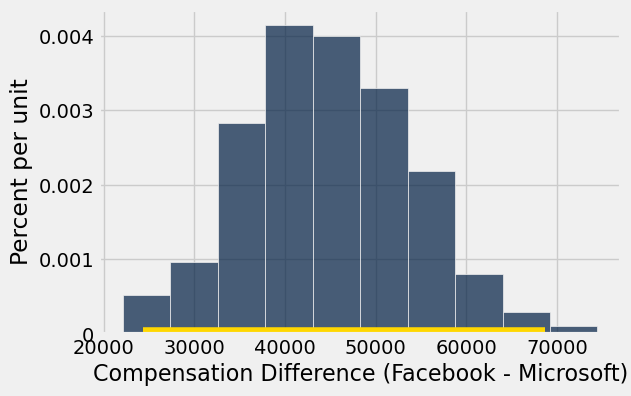

In [31]:
Table().with_column("Compensation Difference (Facebook - Microsoft)", bootstrap_cds).hist()
plots.plot([ci_left, ci_right], [.0000005,.0000005], color="gold");

**Question 8:** Based on the histogram above, do we reject the null hypothesis? What led you to choose your decision?



The original data set's compensational difference was 44570.42676818272. Since this value is in our confidence interval, we cannot reject the null. If the hypothesized value was not in the interval, we would reject the null.

<!-- END QUESTION -->

**Question 9:** We've conducted the same experiment but for Amazon vs Microsoft and generated this histogram. Based on this histogram, should we reject the null hypothesis?
Assume the null hypothesis is that there is no difference between Amazon data scientist salaries versus Microsoft.


1. Reject the null
2. Fall to reject the null
3. Not enough info


<img src="data/amazonmicrosoft.png" width=500>


In [32]:
result = 2

In [34]:
grader.check("q2_9")

q2_9 results: All test cases passed!

## End of Checkpoint
#### Congratulations, you have reached the checkpoint! 

Follow the steps in the Submit your Work section (the last section) of this notebook and submit your Midterm Project Checkpoint to Gradescope.

## Part 3: TITANIC

For the final portion of the midterm, we want you to design your own statistical analysis! You can reference what we did in the first checkpoint of the midterm along the way. We used A/B testing in part 1 and bootstrapping/confidence intervals in part 2.

This is what you will be showcasing during your oral presentations!

In [ ]:
# Run this cell
titanic = Table.read_table('data/titanic.csv')
titanic.show(5)

We expect five components for this project.

1. **EXPLORATORY ANALYSIS** Look at the data to see initial trends; observe your data to formulate a testing idea.


2. **HYPOTHESIS/TEST-STATISTIC** Clearly define your test statistic, null hypothesis, and alternate hypothesis. 


3. **METHOD (a/b testing or bootstrapping)** Clear on which method you are using, either A/B testing or bootstrapping.


4. **VISUALIZATION** Visualizations as needed along the way (preferably at least during the exploratory analysis phase and final results).


5. **RESULTS AND ANALYSIS** Showcase your statistical analysis result and your interpretation for what your results mean.



If you are stuck on deciding what kind of experiment you want to do, here are a few ideas: 

We want to see if certain attributes influence whether one survives the titanic tragedy. Thus, you can compare two different classes (like first and second class) to see whether there is a difference in survival rates between them. You could also analyze whether being male or female influences your chance of survival.

You can and should also reference part 1 for A/B testing and part 2 for bootstrapping if you are stuck for anything coding related!

### CODING HINTS

Here are ways to filter your dataset into only including the data you want.

You can make a copy of your original table (in case you want to experiment with transforming your table into something else without changing the original) with the following code:

`table_name = table.copy()`

You can select the columns you want from a table as follows:

`table_name = table.select('column1', 'column3')`

You can see the results with:

`table_name.show(5)`

For columns containing 3 unique values, you can condense this down to 2 by removing all rows of a certain value (eg. if you want to compare boarding class First vs Second, you want to remove boarding class Third). Example code is:

`table_name = table.where('column_name', are.not_containing('Value that you DONT want'))`

You can make a new cell below the current cell you are on by clicking on the + button (red box in image) and change the type of cell to be code (for coding purposes) or markdown (for writing purposes) by clicking on the blue dropdown box

<img src="data/tooltips.png" width=1000>

In [ ]:
# START HERE AND GOOD LUCK!

In [ ]:
# REMEMBER TUTORING HOURS ARE OFFERED EVERY DAY 
# MONDAY - FRIDAY
# FIND THE TUTORING HOURS SCHEDULE IN GAUCHOSPACE, UNDER SCHEDULE TAB

**1. EXPLORATORY ANALYSIS:** 
Look at the data to see initial trends; observe your data to formulate a testing idea.



<!-- BEGIN QUESTION -->



<!-- END QUESTION -->

**2. HYPOTHESIS/TEST-STATISTIC:** Clearly define your test statistic, null hypothesis, and alternate hypothesis. 


<!-- BEGIN QUESTION -->



<!-- END QUESTION -->

**3. METHOD (A/B testing or Bootstrapping):** Clear on which method you are using, either A/B testing or bootstrapping.



<!-- BEGIN QUESTION -->



<!-- END QUESTION -->

4. **VISUALIZATION** Visualizations as needed along the way (preferably at least during the exploratory analysis phase and final results).


<!-- BEGIN QUESTION -->



<!-- END QUESTION -->

5. **RESULTS AND ANALYSIS** Showcase your statistical analysis result and your interpretation for what your results mean.


<!-- BEGIN QUESTION -->



<!-- END QUESTION -->

**Congratulations!**
**You have completed the CMPSC 5B Midterm Project.**

## Submit your work

Before you submit your work, 
* Make sure you **save the notebook** first, 
* Then go up to the `Kernel` menu and select `Restart & Clear Output` (make sure the notebook is saved first, because otherwise, you will lose all your work!). 
* Now, go to `Cell -> Run All`. Carefully look through your notebook and verify that all computations execute correctly. You should see **no errors**; if there are any errors, make sure to correct them before you submit the notebook.
* Then, go to `File -> Download as -> Notebook` and download the notebook to your own computer. ([Please verify](https://ucsb-ds.github.io/ds1-f20/troubleshooting/#i-downloaded-the-notebook-file-but-it-saves-as-the-ipynbjson-extension-so-whenever-i-upload-it-to-gradescope-it-fails) that it got saved as an `.ipynb` file.)
* Upload the notebook to [Gradescope](https://www.gradescope.com/).

Congratulations! You are done!

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [ ]:
grader.check_all()